In [49]:
#les imports 
#import pyspark
import numpy as np
import pandas as pd
from pyspark.mllib.stat import Statistics 
from math import sqrt 
#from pyspark import SparkContext 
from pprint import pprint
from numpy import array

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [50]:
#import pandas as pd

import constants
df = pd.read_csv("kddcup.data_10_percent.gz", names = constants.names)

In [51]:
#https://github.com/chinskiy/KDD-99
# Categorical features to numeric labels

from sklearn import preprocessing
le_dicts = {}

for categorical_name in constants.categorical_names:
    le = preprocessing.LabelEncoder()
    le.fit(df[categorical_name])
    le_dicts[categorical_name] = dict(zip(le.transform(le.classes_), le.classes_))
#     print(categorical_name, ':', le_dicts[categorical_name])
    df[categorical_name + '_num'] = le.fit_transform(df[categorical_name])

#df['label_binary_num'] = df.label.apply(lambda label: 1 if label == 'normal.' else 0)
df['label_four'] = df.label.apply(lambda label: constants.label_to_four_attack_class[label])
df['label_four_num'] = df.label_four.apply(lambda label: constants.five_classes_to_num[label])
df.drop(constants.categorical_names + ['label', 'label_four'], axis=1, inplace=True)
#df.drop(constants.categorical_names + ['label_four'], axis=1, inplace=True)
df.shape

(494021, 42)

In [52]:
#df.describe()
#df.head()

In [53]:
df = df.values

In [54]:
import argparse
import numpy as np
import sys
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")

from gcforest.gcforest import GCForest
#from gcforest.utils.config_utils import load_json

In [55]:
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
# k=5   Estimator = 10
config = load_json("./examples/demo_kdd2-ca.json")
gc = GCForest(config)

In [56]:
from sklearn.cross_validation import train_test_split


y = df[:,41]
X = df[:,0:41]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
y.shape

(494021,)

In [58]:
X.shape

(494021, 41)

In [59]:
import numpy as np
import os
import os.path as osp
import pickle
len(np.unique(y_train)) 

5

In [60]:
 # If the model you use cost too much memory for you.
    # You can use these methods to force gcforest not keeping model in memory
    # gc.set_keep_model_in_mem(False), default is TRUE.

#(X_train, y_train), (X_test, y_test) = df.
#X_train, y_train = X_train[:28691], y_train[:28691]
#X_train = X_train[:, np.newaxis,:]
#X_test = X_test[:, np.newaxis,:]

In [61]:
# Plot normalized confusion matrix
class_names=['0','1','2','3','4']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
X_train_enc = gc.fit_transform(X_train, y_train)
    # X_enc is the concatenated predict_proba result of each estimators of the last layer of the GCForest model
    # X_enc.shape =
    #   (n_datas, n_estimators * n_classes): If cascade is provided
    #   (n_datas, n_estimators * n_classes, dimX, dimY): If only finegrained part is provided
    # You can also pass X_test, y_test to fit_transform method, then the accracy on test data will be logged when training.
#X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    # WARNING: if you set gc.set_keep_model_in_mem(True), you would have to use
    # gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) to evaluate your model.
    
 

[ 2018-02-20 17:07:52,942][cascade_classifier.fit_transform] X_groups_train.shape=[(330994, 41)],y_train.shape=(330994,),X_groups_test.shape=no_test,y_test.shape=no_test
[ 2018-02-20 17:07:52,986][cascade_classifier.fit_transform] group_dims=[41]
[ 2018-02-20 17:07:52,988][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-02-20 17:07:52,989][cascade_classifier.fit_transform] group_ends=[41]
[ 2018-02-20 17:07:52,990][cascade_classifier.fit_transform] X_train.shape=(330994, 41),X_test.shape=(0, 41)
[ 2018-02-20 17:07:53,046][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(330994, 41), X_cur_test.shape=(0, 41)
[ 2018-02-20 17:08:13,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_0.predict)=99.87%
[ 2018-02-20 17:08:33,345][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_1.predict)=99.87%
[ 2018-02-20 17:08:53,445][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_fo

[ 2018-02-20 17:28:09,913][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_3.predict)=99.98%
[ 2018-02-20 17:28:10,716][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_4.predict)=99.98%
[ 2018-02-20 17:28:10,725][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_cv.predict)=99.98%
[ 2018-02-20 17:28:11,528][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_0.predict)=99.97%
[ 2018-02-20 17:28:12,339][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_1.predict)=99.98%
[ 2018-02-20 17:28:13,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_2.predict)=99.98%
[ 2018-02-20 17:28:13,946][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_3.predict)=99.97%
[ 2018-02-20 17:28:14,644][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_4.predict)=99.98%
[ 2018-

[ 2018-02-20 17:57:46,094][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_3 - 5_folds.train_cv.predict)=98.14%
[ 2018-02-20 17:57:46,116][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.97%
[ 2018-02-20 17:57:46,117][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=2, accuracy_train=99.98%, accuracy_test=0.00%


In [63]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of GcForest = {:.6f} %".format(acc * 100))

[ 2018-02-20 17:57:46,147][cascade_classifier.transform] X_groups_test.shape=[(163027, 41)]
[ 2018-02-20 17:57:46,155][cascade_classifier.transform] group_dims=[41]
[ 2018-02-20 17:57:46,157][cascade_classifier.transform] X_test.shape=(163027, 41)
[ 2018-02-20 17:57:46,166][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(163027, 41)
[ 2018-02-20 17:57:49,161][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(163027, 61)


Test Accuracy of GcForest = 99.980985 %


Confusion matrix, without normalization
Normalized confusion matrix


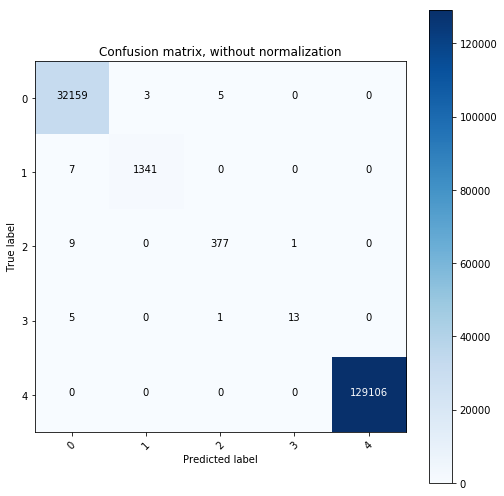

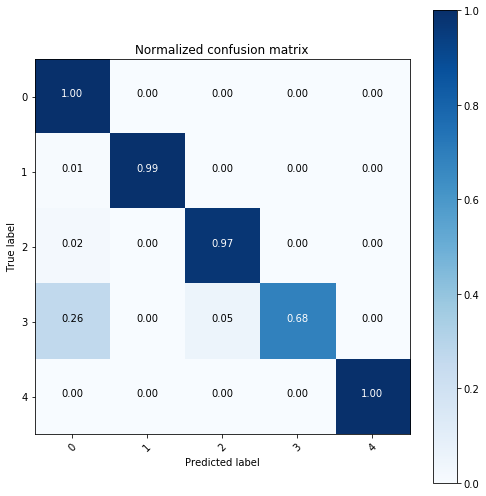

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [65]:
from time import time
t0 = time()

# You can try passing X_enc to another classfier on top of gcForest.e.g. xgboost/RF.
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1)
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of Other classifier using gcforest's X_encode = {:.6f} %".format(acc * 100)) 


tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")


[ 2018-02-20 17:57:53,051][cascade_classifier.transform] X_groups_test.shape=[(163027, 41)]
[ 2018-02-20 17:57:53,059][cascade_classifier.transform] group_dims=[41]
[ 2018-02-20 17:57:53,061][cascade_classifier.transform] X_test.shape=(163027, 41)
[ 2018-02-20 17:57:53,070][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(163027, 41)
[ 2018-02-20 17:57:56,064][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(163027, 61)


X_train_enc.shape=(330994, 61), X_test_enc.shape=(163027, 61)
Test Accuracy of Other classifier using gcforest's X_encode = 99.981598 %
('Compte fait en ', '53.918', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


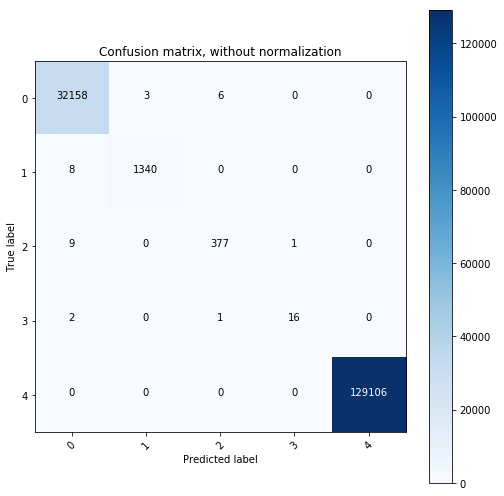

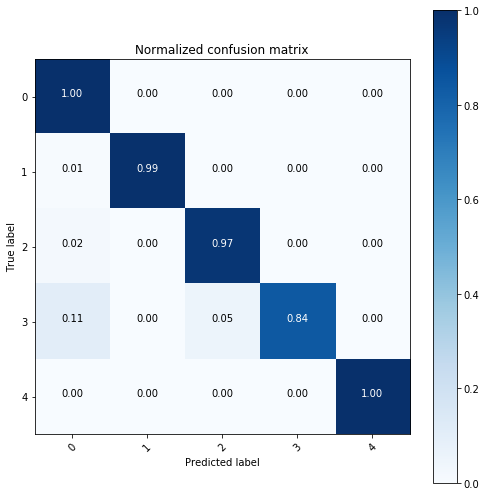

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
from time import time
t0 = time()
     
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of RandomForestClassifier = {:.6f} %".format(acc * 100))   
 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(330994, 41), X_test.shape=(163027, 41)
Test Accuracy of RandomForestClassifier = 99.977918 %
('Compte fait en ', '42.407', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


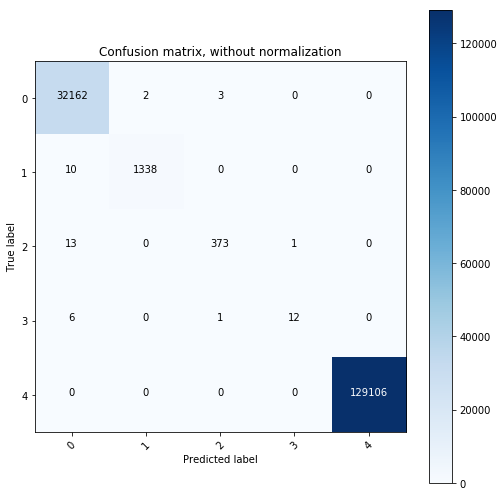

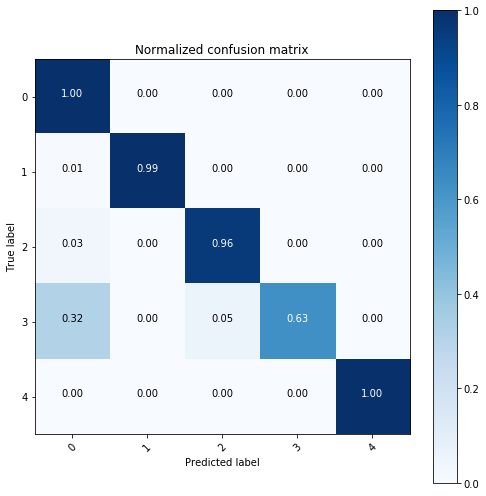

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
 
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [69]:
from time import time
t0 = time()

from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = LogisticRegression()
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of LogisticRegression using gcforest's X_encode = {:.6f} %".format(acc * 100))  

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train_enc.shape=(330994, 61), X_test_enc.shape=(163027, 61)
Test Accuracy of LogisticRegression using gcforest's X_encode = 98.387997 %
('Compte fait en ', '119.653', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


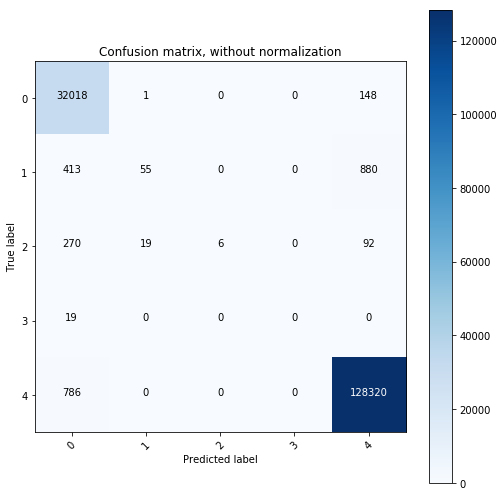

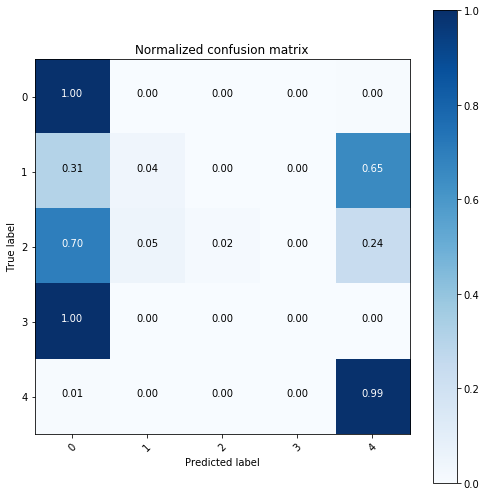

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [71]:
from time import time
t0 = time()
 
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of LogisticRegression = {:.6f} %".format(acc * 100)) 
 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(330994, 41), X_test.shape=(163027, 41)
Test Accuracy of LogisticRegression = 98.037135 %
('Compte fait en ', '73.502', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


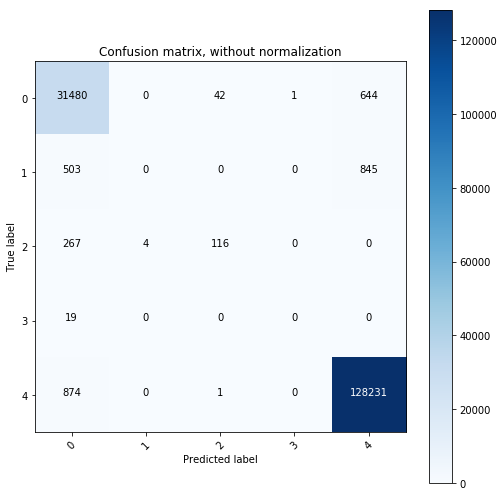

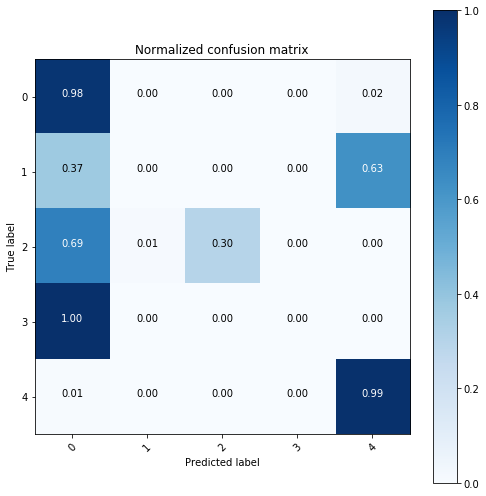

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
from time import time
t0 = time()

from xgboost import XGBClassifier
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = XGBClassifier()
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of XGBClassifier using gcforest's X_encode = {:.6f} %".format(acc * 100))  

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train_enc.shape=(330994, 61), X_test_enc.shape=(163027, 61)
Test Accuracy of XGBClassifier using gcforest's X_encode = 99.982212 %
('Compte fait en ', '266.852', ' seconds')


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
Normalized confusion matrix


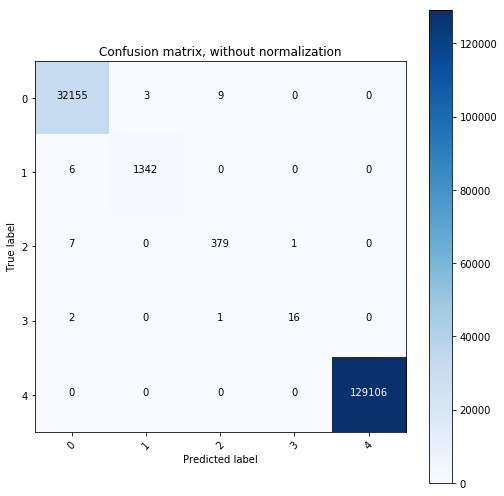

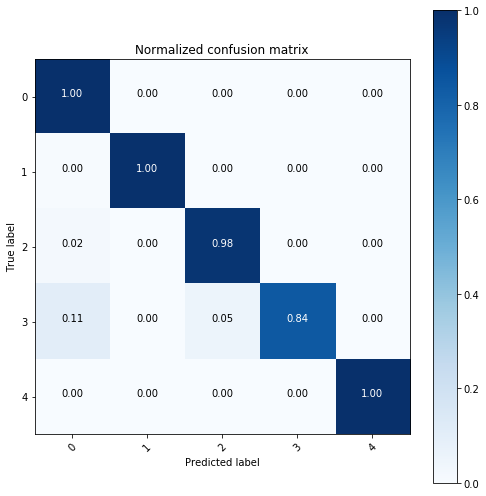

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [75]:
from time import time
t0 = time()

from xgboost import XGBClassifier
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of XGBClassifier = {:.6f} %".format(acc * 100))  

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(330994, 41), X_test.shape=(163027, 41)
Test Accuracy of XGBClassifier = 99.961969 %
('Compte fait en ', '183.75', ' seconds')


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
Normalized confusion matrix


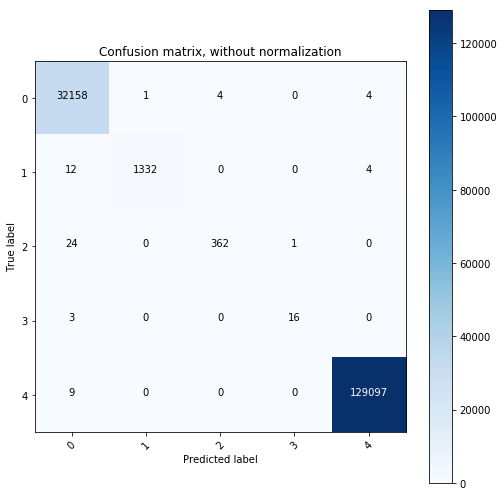

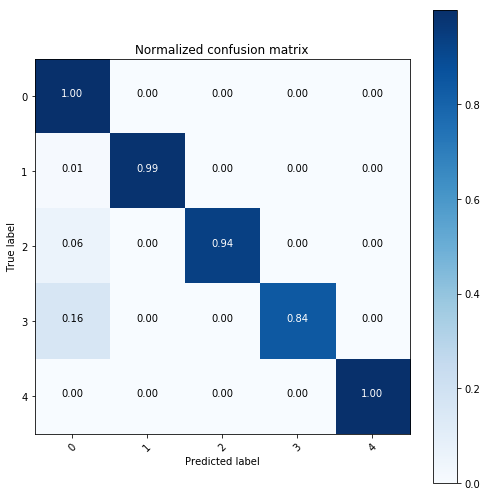

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

[0.02 0.13 0.11 0.   0.03 0.   0.02 0.01 0.01 0.02 0.01 0.   0.01 0.02
 0.   0.   0.   0.   0.   0.08 0.01 0.02 0.01 0.   0.   0.   0.03 0.02
 0.05 0.06 0.02 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.04 0.08 0.02]


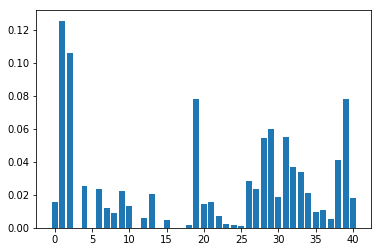

In [77]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# feature importance
print(clf.feature_importances_)
# plot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

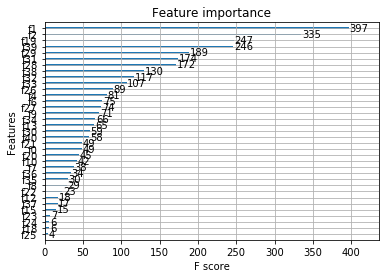

In [78]:
# plot feature importance
from xgboost import plot_importance
plot_importance(clf,height=0.3, title='Feature importance')
pyplot.show()

In [79]:
from time import time
t0 = time()

from sklearn.ensemble import ExtraTreesClassifier
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = ExtraTreesClassifier()
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTreesClassifier using gcforest's X_encode = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train_enc.shape=(330994, 61), X_test_enc.shape=(163027, 61)
Test Accuracy of ExtraTreesClassifier using gcforest's X_encode = 99.979758 %
('Compte fait en ', '2.372', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


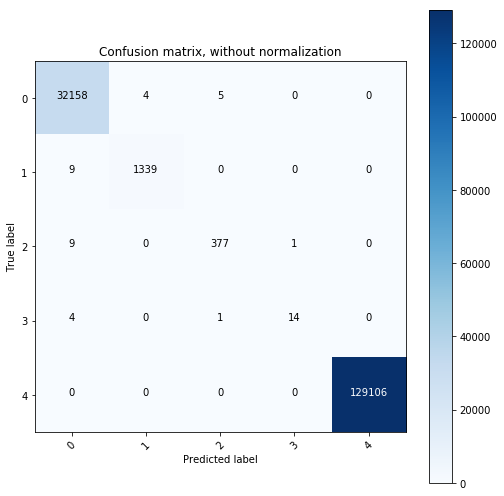

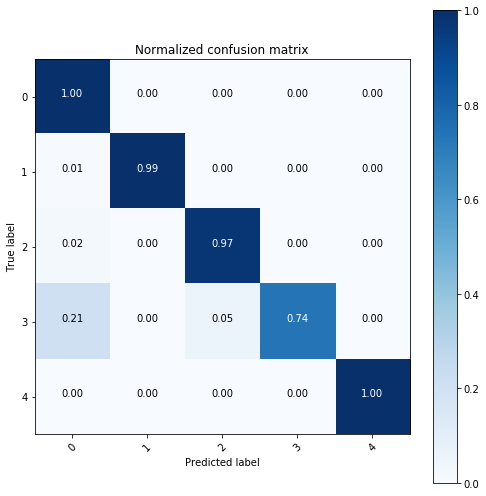

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [81]:
from time import time
t0 = time()

from sklearn.ensemble import ExtraTreesClassifier
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTreesClassifier = {:.6f} %".format(acc * 100)) 

 
tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(330994, 41), X_test.shape=(163027, 41)
Test Accuracy of ExtraTreesClassifier = 99.970557 %
('Compte fait en ', '2.135', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


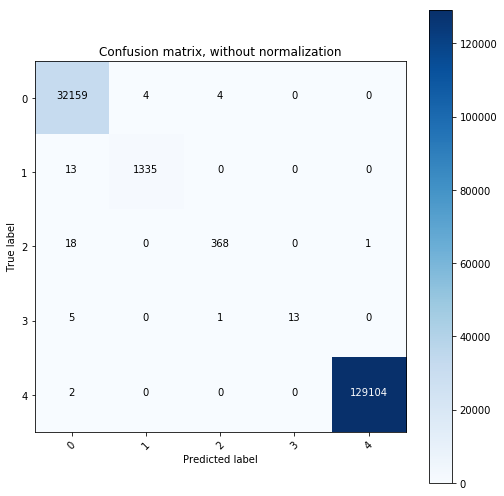

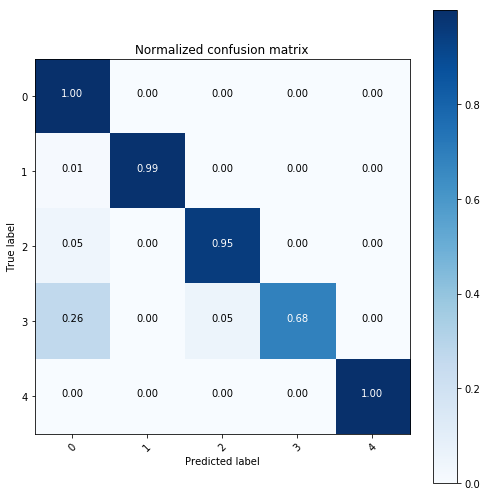

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
 
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [83]:
# dump Model
with open("kdd10.pkl", "wb") as f:
        pickle.dump(gc, f, pickle.HIGHEST_PROTOCOL)
    # load
with open("kdd10.pkl", "rb") as f:
        gc = pickle.load(f)
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of GcForest (save and load) = {:.6f} %".format(acc * 100))

[ 2018-02-20 18:10:23,602][cascade_classifier.transform] X_groups_test.shape=[(163027, 41)]
[ 2018-02-20 18:10:23,610][cascade_classifier.transform] group_dims=[41]
[ 2018-02-20 18:10:23,611][cascade_classifier.transform] X_test.shape=(163027, 41)
[ 2018-02-20 18:10:23,621][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(163027, 41)
[ 2018-02-20 18:10:26,719][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(163027, 61)


Test Accuracy of GcForest (save and load) = 99.980985 %


--------------------------------------------------------------- 